# Challenge 1: Classification
In this challenge, you're given a food classification dataset which has 101 classes. You need to analyze and preprocess the dataset as well as build deep learning models for performing food classification. 

You are also required to write a function to apply an augmentation as explained below: <br>
1) Take 5 random images (numpy format) as an input to the function. <br>
2) Randomly arrange the 5 images in a single image while preserving the aspect ratio of each image. <br>
3) Final image size should be an input parameter to the function. <br>
4) Output format shall be numpy format. 
(Note - If required, you can use this augmentation function while training the models). <br>

<br>
Two models are to be trained for this task, mainly light, and medium model. <br>
Examples: <br>
Light model - mobilenetv2 <br>
Medium model - Resnet50 <br>
<br>

**Main Objective**:
You are supposed to use both TensorFlow and PyTorch for this task. You need to train one model for each framework. 

# New Section

## Summary 

**Create a table for your train and test accuracy as well as speed for each model (mention the framework used for training)**

## Augmentation function given in the problem statement

### augmentation function have been performed by by attaching 5 images together
#### Steps involved in augmentation :
    # Images have been cropped without affecting aspect ratio.
    # Crops are resized and flipped to provide varition
    # Image grid is created by shuffling and attaching the crop images 
    # Grid image acts as a augmented images which has all properties of original image and augmentation is done classwise

In [1]:
from imgaug import augmenters as iaa
import glob
import numpy as np

def random_crop(images, random_state, parents, hooks):
    crop_h, crop_w = 128, 128
    new_images = []
    for img in images:
        if (img.shape[0] >= crop_h) and (img.shape[1] >= crop_w):
            rand_h = np.random.randint(0, img.shape[0]-crop_h)
            rand_w = np.random.randint(0, img.shape[1]-crop_w)
            new_images.append(img[rand_h:rand_h+crop_h, rand_w:rand_w+crop_w])
        else:
             new_images.append(np.zeros((crop_h, crop_w, 3)))
    return np.array(new_images)

def keypoints_dummy(keypoints_on_images, random_state, parents, hooks):
    return keypoints_on_images

cropper = iaa.Lambda(func_images=random_crop, func_keypoints=keypoints_dummy)

In [2]:
seq = iaa.Sequential([cropper, iaa.Fliplr(0.5), iaa.Flipud(0.5)])

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
crops_per_image = 9

In [ ]:
import os
import random
import numpy as np
import math

start = 0
for cat in os.listdir('data/train'):
    images_list = np.array(os.listdir('data/train/'+cat))
    index_images=[i for i in range(0,750)]
    random.shuffle(index_images)
    
    if cat =="gyoza":
        start=1
    
    if start==0:
        continue 
    else: 
        for i in range(150):
            flag=0
            image_index=index_images[i*5:(i+1)*5]
            file_names=images_list[image_index]

            aug_name="_".join([str(i) for i in index_images[i*5:(i+1)*5]])


            for file_name in file_names:

                images = [mpimg.imread(path) for path in glob.glob('C:/Users/anagha/Desktop/Food101/data/train/'+cat+"/"+file_name)]
                augs = np.array([seq.augment_image(img)/255 for img in images for _ in range(crops_per_image)])
                if flag==0:
                    data_augs = augs
                    flag=1
                else:
                    data_augs=np.concatenate((data_augs,augs))
            n=random.sample(range(45), 9)
            imgs=data_augs[n]
            grid_size = math.ceil(math.sqrt(9))
            images_count =9
            # Create plt plot:
            fig, axes = plt.subplots(grid_size, grid_size, figsize=(5, 5), frameon=False)

            current_file_number = 0
            for image_filename in imgs:
                x_position = current_file_number % grid_size
                y_position = current_file_number // grid_size
                axes[x_position, y_position].imshow(image_filename, interpolation='nearest')
                axes[x_position, y_position].set_axis_off()
                current_file_number += 1
            ax = plt.subplots_adjust(wspace=0, hspace=0)
            plt.savefig("C:/Users/anagha/Desktop/Food101/data/train/"+cat+"/aug_"+aug_name+".jpg", bbox_inches='tight', pad_inches = 0)
            print("C:/Users/anagha/Desktop/Food101/data/train/"+cat+"/aug_"+aug_name+".jpg")

In [ ]:
# visulise the augmented data

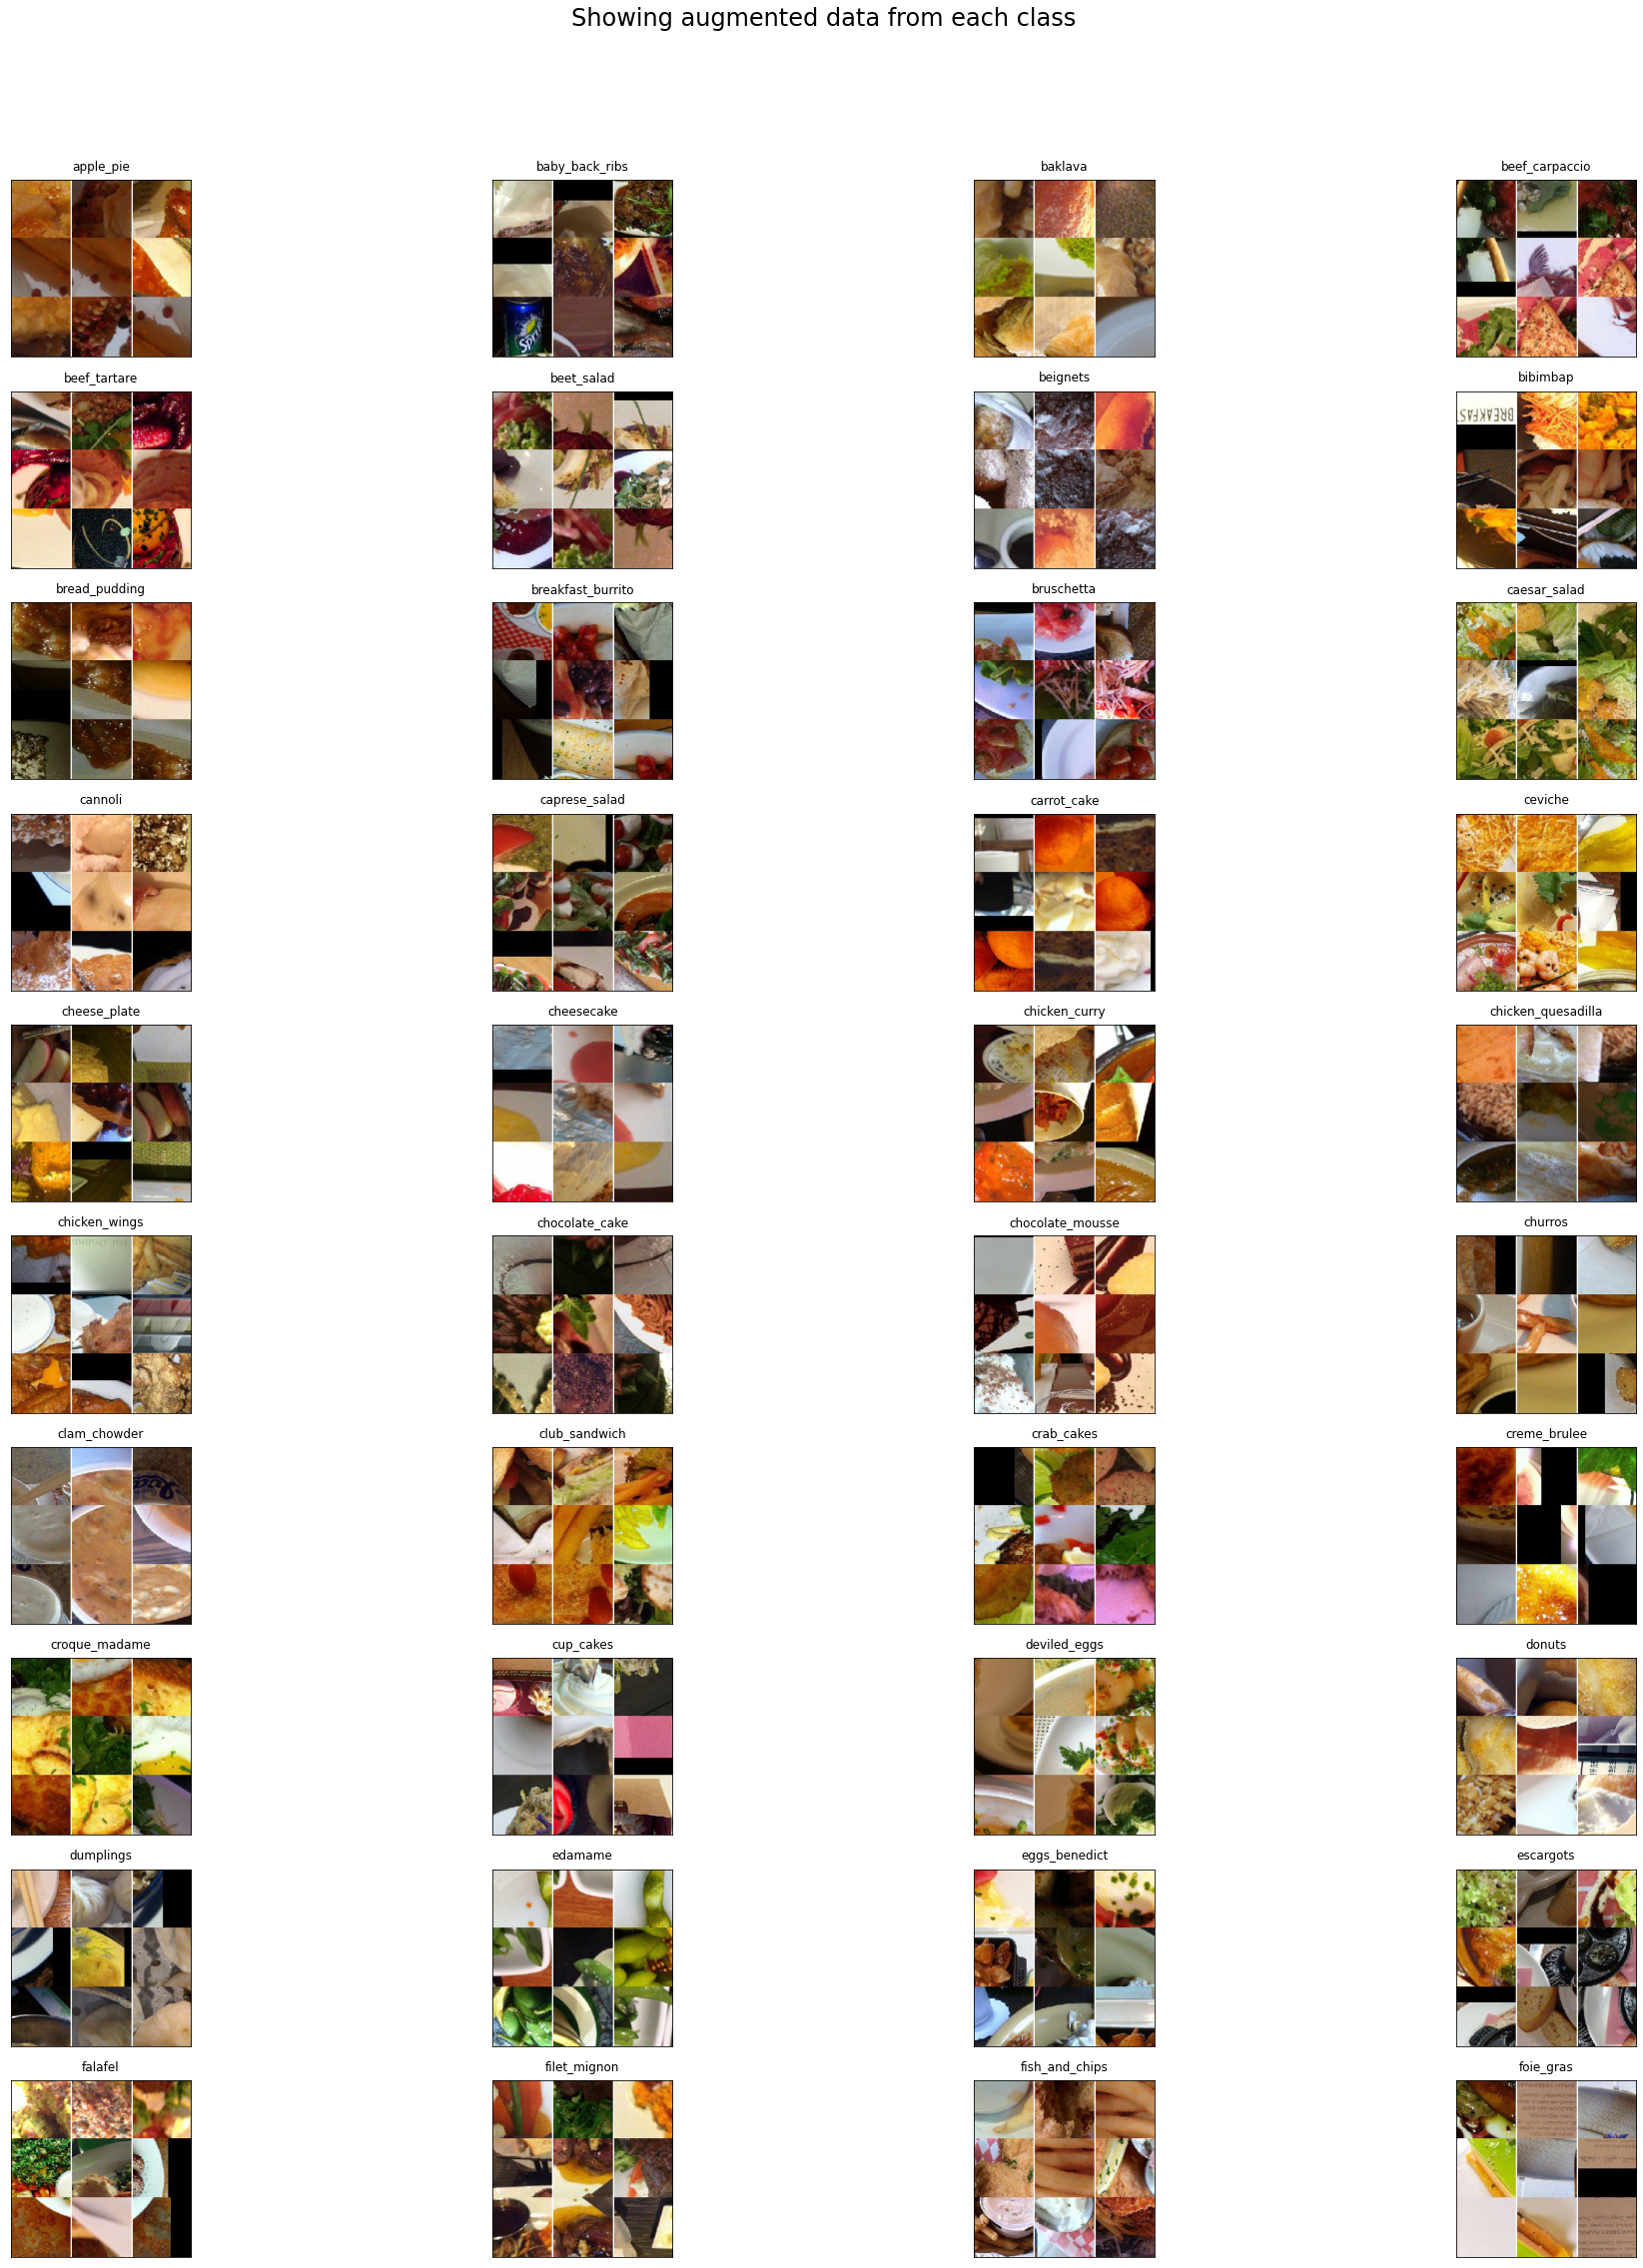

In [81]:
import os
# Visualize the data, showing one image per class from 101 classes
rows = 10
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(30,30))
fig.suptitle("Showing augmented data from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "C:/Users/anagha/Desktop/Food101/data/train/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0

for i in range(rows):
      for j in range(cols):
        try:
            food_selected = foods_sorted[food_id] 
            food_id += 1
        except:
              break
        if food_selected == '.DS_Store':
            continue
        food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
        augmented_images=[]
        for image in food_selected_images:
            if 'aug' in image:
                augmented_images.append(image)
        
        food_selected_random = np.random.choice(augmented_images) # picks one food item from the list as choice, takes a list and returns one random item
        img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
        
        ax[i][j].imshow(img)
        ax[i][j].set_title(food_selected, pad = 10)
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

# Analyze the dataset
## Objectives
1. Upload the dataset provided (Google Drive link). 
2. Extract the dataset. 
3. Re-arrange dataset into training and testing folders. 
4. List number of samples in training and testing folders. 
5. Plot sample images from training and testing datasets. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


### Data preparation
    Train and test folder are formed using train and test json files

In [ ]:
from glob import glob
import shutil
from PIL import Image

In [ ]:
def file_move(source, dest):
    """## 
    ## Function to move and pad file
    ## sourc: location where file located
    ## dest: File save Destination"""
    img = Image.open(source)                                     ## Opening Image File
    img_size = img.size
    target_size = max(img_size)
    ratio = 1.0
    new_size = tuple([int(x*ratio) for x in img_size])
    img = img.resize(new_size, Image.ANTIALIAS)
    new_img = Image.new("RGB", (target_size, target_size))
    new_img.paste(img, ((target_size-new_size[0])//2,
                        (target_size-new_size[1])//2))
    new_img.save(dest) 

In [ ]:
##  imported paths
image_dir = './images/'
meta_dir = './meta/'
train_data_dir = './data/train/'
test_data_dir = './data/test/'

In [ ]:
# create training data
import pandas as pd
df_train = pd.read_json(meta_dir +'train.json')  ##  Loading Traning meta Data.
df_train.columns

In [ ]:
train_cat = df_train.columns.tolist()

In [ ]:
import os
for col in train_cat:                                         #   with individual columns.
    if os.path.isdir(train_data_dir +col)!=True:                                            
        os.makedirs(train_data_dir +col)                 ##  creating Directory for training data.
    for i in range(len(df_train)):
        source_loc = image_dir + str(df_train[col][i])+'.jpg'
        dest_loc = train_data_dir + str(df_train[col][i])+'.jpg'
        file_move(source_loc, dest_loc)

In [ ]:
## Total number of samples in train folder
train_images = glob(train_data_dir +'/*/*.jpg')
print(f"Total number of samples in train folder = {len(train_images)}")

In [ ]:
# create testing data
df_test = pd.read_json(meta_dir +'test.json')    ##  Loading Traning meta Data.
test_cat = train_cat                        

for col in test_cat:                                         #   with individual columns.
    if os.path.isdir(test_data_dir +col)!=True:                                            
        os.makedirs(test_data_dir +col)                 ##  creating Directory for training data.
    for i in range(len(df_test)):
        source_loc = image_dir + str(df_test[col][i])+'.jpg'
        dest_loc = test_data_dir + str(df_test[col][i])+'.jpg'
        print(source_loc,dest_loc)
        file_move(source_loc, dest_loc)

In [ ]:
test_images = glob(test_data_dir + '/*/*.jpg')
print(f"Total number of samples in test folder = {len(test_images)}")

### Data creation for running neural network
    ImageDataGenerator from the tensorflow have been used to create train and test data
    Train folder also contains the annotated augmented images classwise

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
datagen = ImageDataGenerator()

In [6]:
train_data = datagen.flow_from_directory('./data/train', batch_size=32,target_size=(224,224))

Found 90900 images belonging to 101 classes.


In [7]:
print("Total number of samples in train folder: ", train_data.samples)

Total number of samples in train folder:  90900


In [8]:
test_data = datagen.flow_from_directory('./data/test', batch_size=32,target_size=(224,224))

Found 25250 images belonging to 101 classes.


In [9]:
print("Total number of samples in test folder", test_data.samples)

Total number of samples in test folder 25250


# Pre-process Images
## Objectives
1. Implement preprocessing codes for each model. 
2. Augment the dataset. 
3. Preview the preprocessed dataset. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


In [ ]:
# visulising whole training data from each class

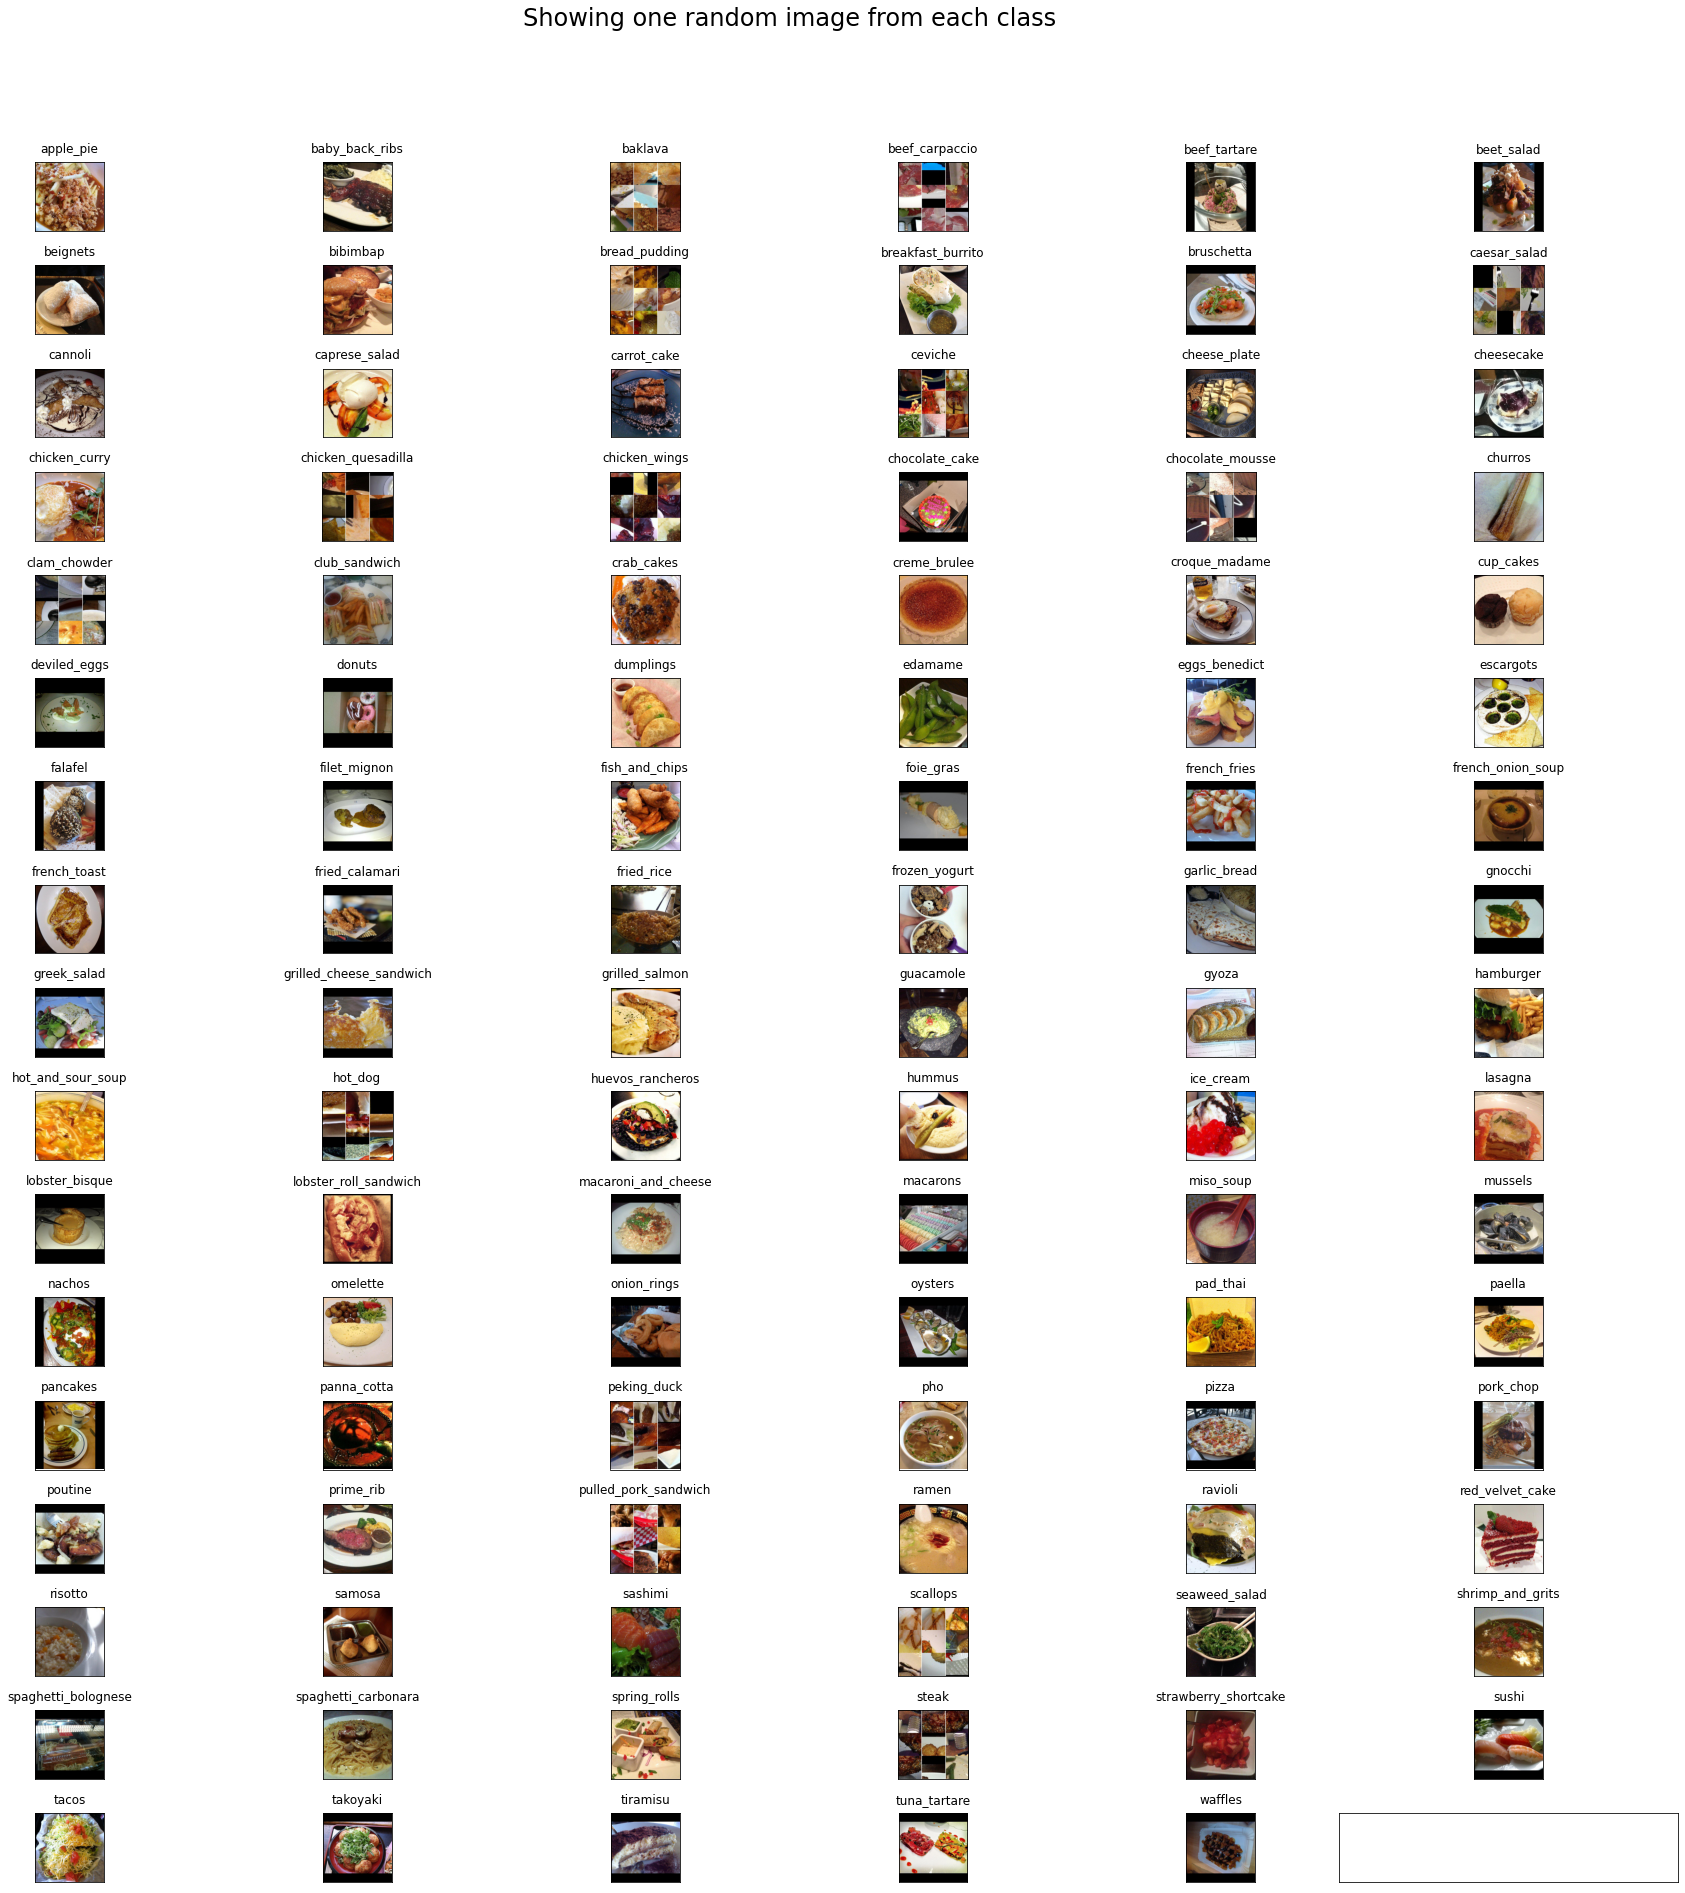

In [68]:
import os
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "C:/Users/Swapnil/Desktop/Food101/data/train/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
      for j in range(cols):
        try:
            food_selected = foods_sorted[food_id] 
            food_id += 1
        except:
              break
        if food_selected == '.DS_Store':
            continue
        food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
        food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
        img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
        ax[i][j].imshow(img)
        ax[i][j].set_title(food_selected, pad = 10)
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

# Training different models
## Objectives
1. Obtain 90% accuracy in all the models trained. 
2. You're free to use any techniques for traning such as transfer learning, knowledge transfer, etc. 
3. The models should not overfit the training dataset. 
4. Measure the performance in terms of accuracy and speed of each model. 
5. Visualize the training and testing performance using TensorBoard. 

#### Optional:
1. Apply weight quantization to increase the speed of the models. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


## Train Light model tensorflow

In [37]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [14]:
#initialise base model
IMG_SHAPE = (224, 224, 3)
base_model = MobileNetV2(input_shape=IMG_SHAPE, input_tensor=None,
                                                include_top=False, 
                                                weights='imagenet')
base_model.trainable = True

In [15]:
#define model
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(320, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(320, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(101, activation='softmax'))
#compile model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 320)               409920    
_________________________________________________________________
dropout (Dropout)            (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 320)               102720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 101)               3

C:\Users\Swapnil\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [29]:
#fit the model
history = model.fit(train_data, 
                    epochs=50,          
                    batch_size=64,
                    verbose=1)

Epoch 1/50
2841/2841 [==============================] - 1675s 589ms/step - loss: 0.4402 - accuracy: 0.8703
Epoch 2/50
2841/2841 [==============================] - 687s 242ms/step - loss: 0.4094 - accuracy: 0.8780
Epoch 3/50
2841/2841 [==============================] - 672s 237ms/step - loss: 0.3744 - accuracy: 0.8881
Epoch 4/50
2841/2841 [==============================] - 647s 228ms/step - loss: 0.3451 - accuracy: 0.8960
Epoch 5/50
2841/2841 [==============================] - 647s 228ms/step - loss: 0.3218 - accuracy: 0.9031
Epoch 6/50
2841/2841 [==============================] - 638s 224ms/step - loss: 0.2977 - accuracy: 0.9094
Epoch 7/50
2841/2841 [==============================] - 647s 228ms/step - loss: 0.2683 - accuracy: 0.9174
Epoch 8/50
2841/2841 [==============================] - 648s 228ms/step - loss: 0.2581 - accuracy: 0.9202
Epoch 9/50
2841/2841 [==============================] - 649s 229ms/step - loss: 0.2392 - accuracy: 0.9257
Epoch 10/50
2841/2841 [======================

In [30]:
model.save("C:/Users/Swapnil/Desktop/Food101/mobilenet.h5")

C:\Users\Swapnil\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


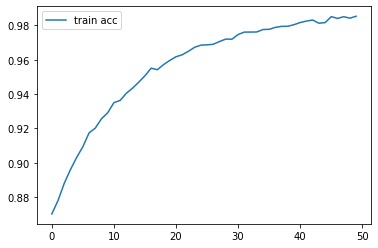

In [31]:
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.savefig("mobilenet_acc_curve.png")
plt.show()

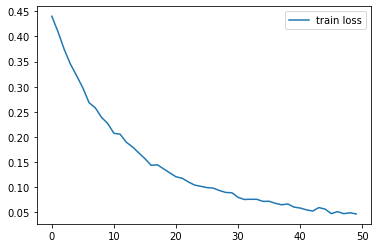

In [32]:
plt.plot(history.history['loss'], label='train loss')
plt.legend()
plt.savefig("mobilenet_loss_curve.png")
plt.show()

In [33]:
model.evaluate(test_data)

790/790 [==============================] - 92s 117ms/step - loss: 1.5598 - accuracy: 0.7416


[1.559836506843567, 0.7415841817855835]

## Train Medium model tensorflow

In [54]:
# example of loading the resnet50 model
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
conv_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

#define model
res_model = tf.keras.Sequential()
res_model.add(conv_model)
res_model.add(tf.keras.layers.GlobalAveragePooling2D())
res_model.add(tf.keras.layers.Dense(320, activation='relu'))
res_model.add(tf.keras.layers.Dropout(0.2))
res_model.add(tf.keras.layers.Dense(320, activation='relu'))
res_model.add(tf.keras.layers.Dropout(0.2))
res_model.add(tf.keras.layers.Dense(101, activation='softmax'))

res_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 320)               655680    
_________________________________________________________________
dropout_2 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 320)               102720    
_________________________________________________________________
dropout_3 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 101)              

In [55]:
res_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy'])

history_resnet50 = res_model.fit_generator(
    train_data, 
    workers=5,
    epochs=50,
)

Epoch 1/50


C:\Users\Swapnil\anaconda3\lib\site-packages\keras\backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


2841/2841 [==============================] - 1086s 380ms/step - loss: 2.7723 - accuracy: 0.3471
Epoch 2/50
2841/2841 [==============================] - 1098s 386ms/step - loss: 1.4964 - accuracy: 0.6154
Epoch 3/50
2841/2841 [==============================] - 1105s 389ms/step - loss: 1.0726 - accuracy: 0.7139
Epoch 4/50
2841/2841 [==============================] - 1110s 391ms/step - loss: 0.7925 - accuracy: 0.7827
Epoch 5/50
2841/2841 [==============================] - 1112s 391ms/step - loss: 0.5939 - accuracy: 0.8339
Epoch 6/50
2841/2841 [==============================] - 1102s 388ms/step - loss: 0.4599 - accuracy: 0.8687
Epoch 7/50
2841/2841 [==============================] - 1077s 379ms/step - loss: 0.3716 - accuracy: 0.8919
Epoch 8/50
2841/2841 [==============================] - 1076s 379ms/step - loss: 0.3066 - accuracy: 0.9103
Epoch 9/50
2841/2841 [==============================] - 1077s 379ms/step - loss: 0.2455 - accuracy: 0.9268
Epoch 10/50
2841/2841 [=========================

In [56]:
res_model.save("C:/Users/Swapnil/Desktop/Food101/resnet50_new.h5")

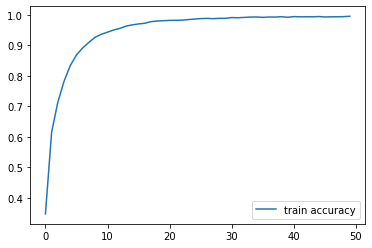

In [58]:
plt.plot(history_resnet50.history['accuracy'], label='train accuracy')
plt.legend()
plt.savefig("mobilenet_loss_curve.png")
plt.show() 

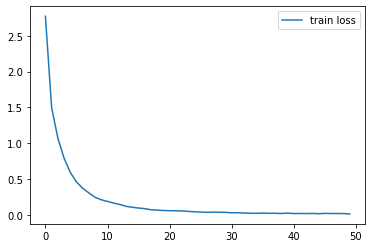

In [59]:
plt.plot(history_resnet50.history['loss'], label='train loss')
plt.legend()
plt.savefig("mobilenet_loss_curve.png")
plt.show() 

In [57]:
full_model.evaluate(test_data)

790/790 [==============================] - 106s 133ms/step - loss: 0.1925 - acc: 0.3371


[0.19251492619514465, 0.3370693027973175]

## Train medium model pytorch 

In [134]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

In [88]:
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Swapnil/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [89]:
for param in model.parameters():
    param.requires_grad = False

In [121]:
transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ])
train_set = datasets.ImageFolder("./data/train",transforms)
val_set   = datasets.ImageFolder("./data/test",transforms)
  
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4,
                                       shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=4,  
                                       shuffle=True, num_workers=4)
classes = train_set.classes
device = torch.device("cuda:0" if torch.cuda.is_available()
                               else "cpu")

In [99]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 101)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [101]:
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(running_loss)
print('Finished Training')

63383.08542793989
Finished Training


In [114]:
correct = 0
total = 0
pred_list = []
correct_list = []
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            pr = predicted.detach().cpu().numpy()
            for i in pr:
                pred_list.append(i)
            tg = labels.detach().cpu().numpy()
            for i in tg:
                correct_list.append(i)
            correct += (predicted ==labels ).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 42.190099 %


## Train light model pytorch 

In [122]:
model = models.mobilenet_v2(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

In [125]:
transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ])
train_set = datasets.ImageFolder("./data/train",transforms)
val_set   = datasets.ImageFolder("./data/test",transforms)
  
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4,
                                       shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=4,  
                                       shuffle=True, num_workers=4)
classes = train_set.classes
device = torch.device("cuda:0" if torch.cuda.is_available()
                               else "cpu")

In [132]:
num_ftrs = model.features
model.fc = nn.Linear(2048, 101)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [140]:
with torch.enable_grad():
    for epoch in range(1):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            #loss = Variable(loss, requires_grad=True)
            loss.requires_grad=True

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(running_loss)
print('Finished Training')

219362.83683300018
Finished Training


In [141]:
correct = 0
total = 0
pred_list = []
correct_list = []
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            pr = predicted.detach().cpu().numpy()
            for i in pr:
                pred_list.append(i)
            tg = labels.detach().cpu().numpy()
            for i in tg:
                correct_list.append(i)
            correct += (predicted ==labels ).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 0.095050 %


In [2]:
# due to hardware inefficiency was not able to finetune and run the model for longer epochs but models have shown the potential to perform better with hyperparameter tuning, finetuining and heavy augmentation.